In [10]:
#1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. (Show the shape and column names as well.)
#Dataset Link (Bike Details Dataset):
#https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view?usp=drive_link

import pandas as pd
bike = 'https://drive.usercontent.google.com/download?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download&authuser=0'
df = pd.read_csv(bike)
print(df.head(10))
print(df.shape)
print(df.columns)

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [12]:
#2.Check for missing values in all columns and describe your approach for handling them.
import pandas as pd
bike = 'https://drive.usercontent.google.com/download?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download&authuser=0'
df = pd.read_csv(bike)
print(df.isnull().sum())

'''Approach for Handling Missing Values
Categorical columns (e.g., bike_name, owner, seller_type):

If missing is small → fill with the most frequent value (mode).

If too many are missing → consider dropping the column.

Numerical columns (e.g., year, km_driven, ex_showroom_price):

Small % missing → fill with mean/median.

If skewed data (like prices, km driven) → prefer median.

If too many values are missing → drop the column.'''

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


'Approach for Handling Missing Values\nCategorical columns (e.g., bike_name, owner, seller_type):\n\nIf missing is small → fill with the most frequent value (mode).\n\nIf too many are missing → consider dropping the column.\n\nNumerical columns (e.g., year, km_driven, ex_showroom_price):\n\nSmall % missing → fill with mean/median.\n\nIf skewed data (like prices, km driven) → prefer median.\n\nIf too many values are missing → drop the column.'

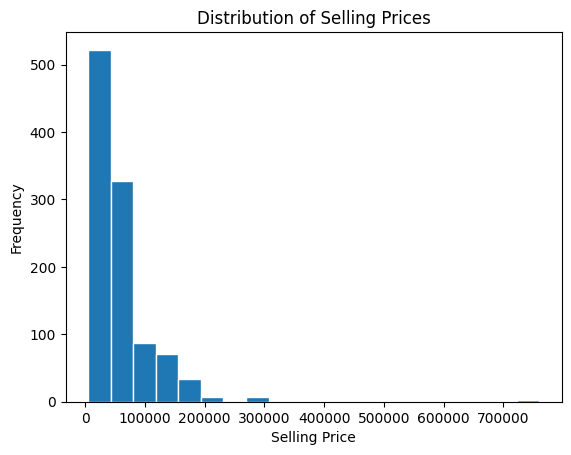

In [20]:
#3.  Plot the distribution of selling prices using a histogram and describe the overall trend.

import pandas as pd
import matplotlib.pyplot as plt
bike = 'https://drive.usercontent.google.com/download?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download&authuser=0'
df = pd.read_csv(bike)
plt.hist(df['selling_price'], bins=20, edgecolor='white')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

/tmp/ipython-input-2949143705.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x="seller_type", y="selling_price", palette="viridis")


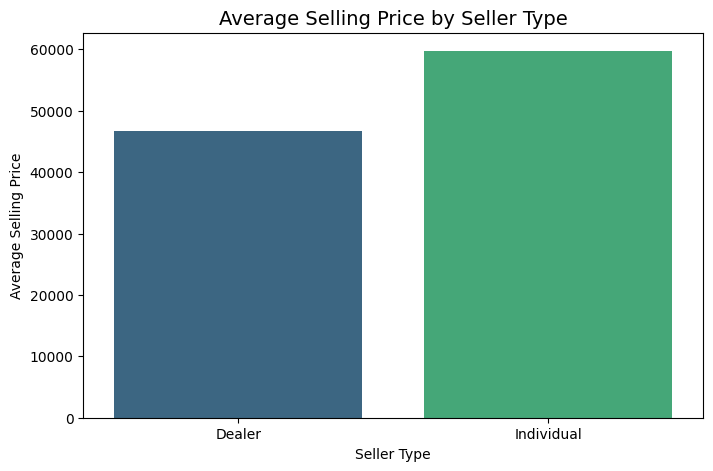

In [23]:
#4. Create a bar plot to visualize the average selling price for each seller_type and write one observation.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
bike = 'https://drive.usercontent.google.com/download?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download&authuser=0'
df = pd.read_csv(bike)
avg_price = df.groupby("seller_type")["selling_price"].mean().reset_index()

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(data=avg_price, x="seller_type", y="selling_price", palette="viridis")

plt.title("Average Selling Price by Seller Type", fontsize=14)
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-1143411389.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_km, x="owner", y="km_driven", palette="coolwarm")


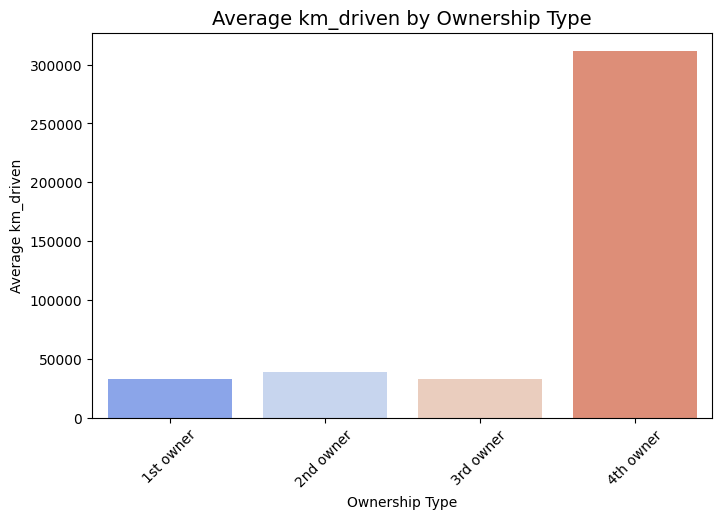

In [25]:
#5. Compute the average km_driven for each ownership type (1st owner,2nd owner, etc.), and present the result as a bar plot.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
bike = 'https://drive.usercontent.google.com/download?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download&authuser=0'
df = pd.read_csv(bike)
avg_km = df.groupby("owner")["km_driven"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_km, x="owner", y="km_driven", palette="coolwarm")

plt.title("Average km_driven by Ownership Type", fontsize=14)
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.xticks(rotation=45)
plt.show()


In [26]:
#6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
import pandas as pd
bike = 'https://drive.usercontent.google.com/download?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download&authuser=0'
df = pd.read_csv(bike)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
df_without_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("Before removing outliers:")
print(df['km_driven'].describe())
print("\nAfter removing outliers:")
print(df_without_outliers['km_driven'].describe())

Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


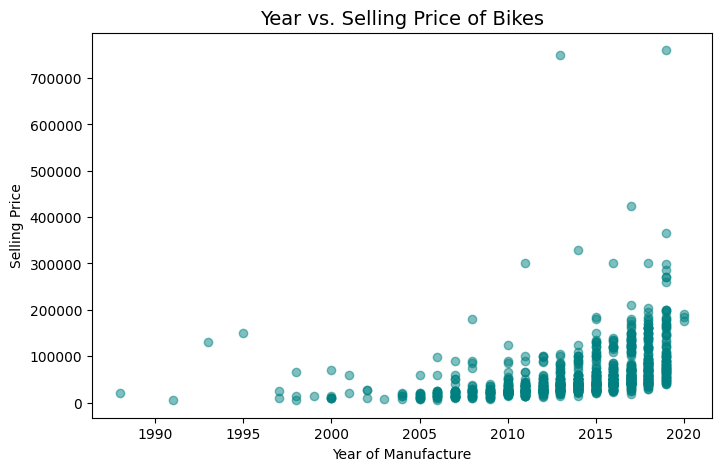

In [27]:
#7. Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
import pandas as pd
import matplotlib.pyplot as plt
bike = 'https://drive.usercontent.google.com/download?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download&authuser=0'
df = pd.read_csv(bike)
plt.figure(figsize=(8,5))
plt.scatter(df["year"], df["selling_price"], alpha=0.5, c="teal")

plt.title("Year vs. Selling Price of Bikes", fontsize=14)
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()

In [29]:
#8. : Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
import pandas as pd
bike = 'https://drive.usercontent.google.com/download?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download&authuser=0'
df = pd.read_csv(bike)
df_encoded = pd.get_dummies(df, columns=['seller_type'],dtype=int)
print(df_encoded.head(5))

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN                   0                       1  
1       5650                NaN                   0                       1  
2      12000           148114.0                   0                       1  
3      23000            89643.0                   0                       1  
4      21000                NaN                   0                       1  


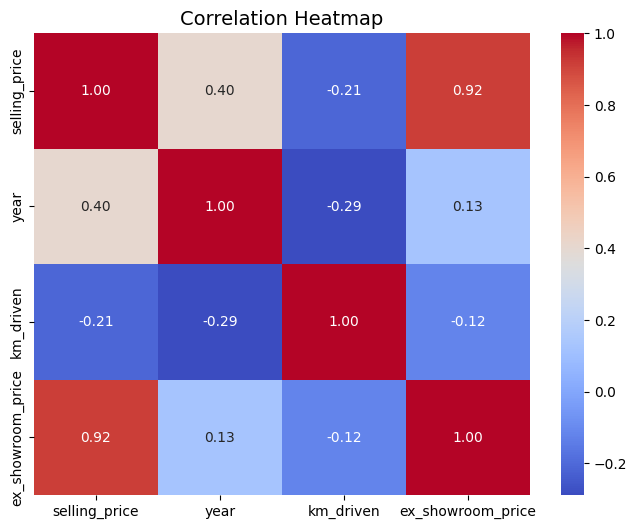

In [33]:
#9. Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
bike = 'https://drive.usercontent.google.com/download?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download&authuser=0'
df = pd.read_csv(bike)
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap", fontsize=14)
plt.show()

First 5 rows:
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  

Shape of dataset: (1061, 7)

Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']

Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner 

/tmp/ipython-input-1622004449.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x="seller_type", y="selling_price", palette="viridis")


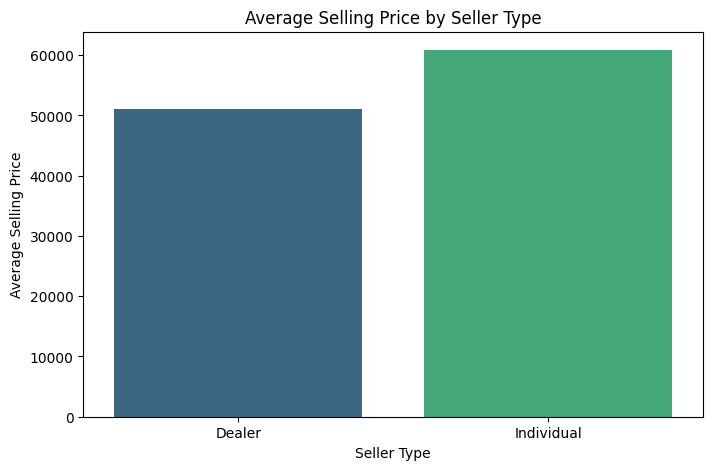

/tmp/ipython-input-1622004449.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_km, x="owner", y="km_driven", palette="coolwarm")


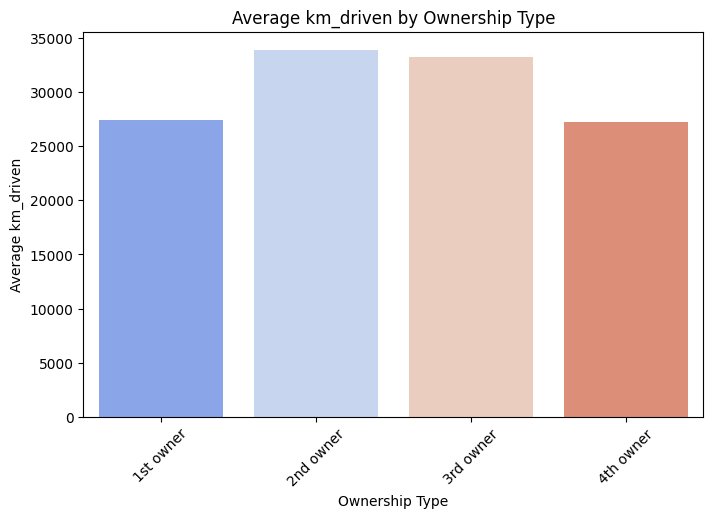

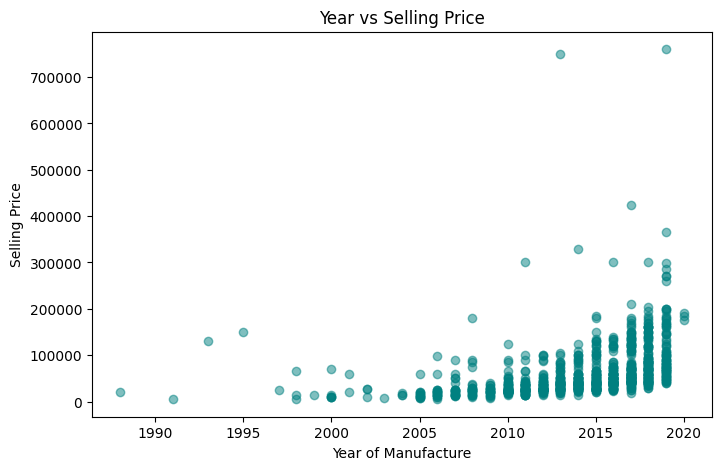

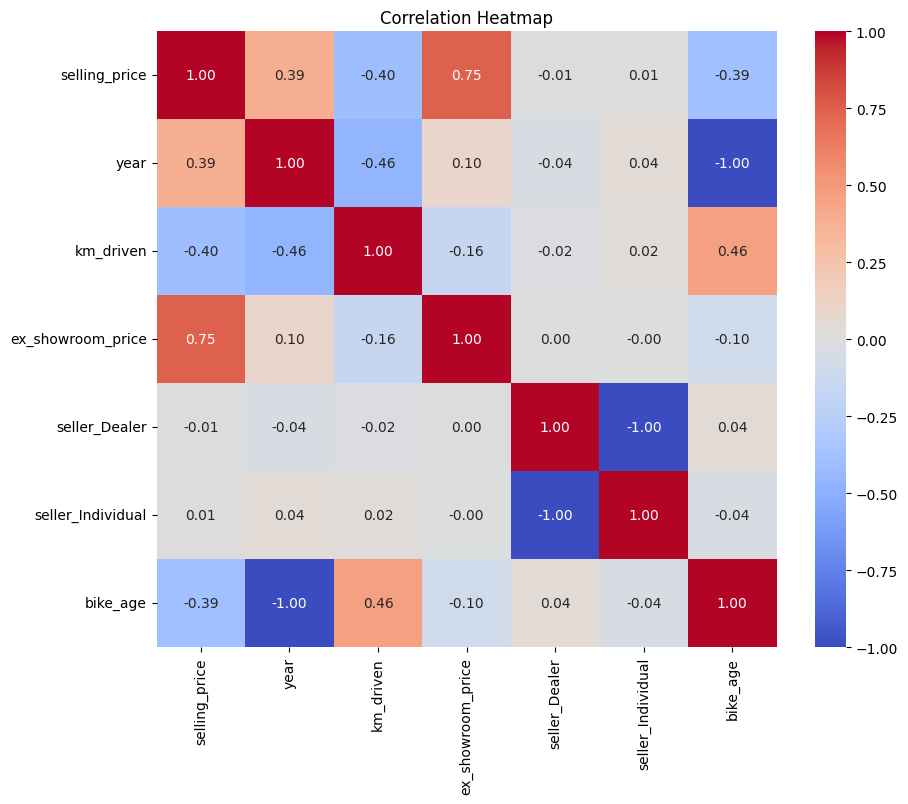


Top correlations with selling_price:
selling_price        1.000000
ex_showroom_price    0.747030
year                 0.389686
seller_Individual    0.012102
seller_Dealer       -0.012102
bike_age            -0.389686
km_driven           -0.403412
Name: selling_price, dtype: float64

Summary Report:

Key factors affecting selling price:
1. Year of manufacture (or bike age) — newer bikes are more expensive.
2. Kilometers driven — higher mileage reduces price.
3. Ownership type — fewer previous owners increase value.
4. Seller type — dealer listings often have higher prices.

Data Cleaning:
- Filled missing categorical values with mode.
- Filled missing numerical values with median.
- Dropped rows missing the selling_price.
- Removed outliers in km_driven using the IQR method.

Feature Engineering:
- One-hot encoding of seller_type.
- Created bike_age = 2025 - year.

Conclusion:
These features are most influential and prepare the dataset for predictive modeling.



In [34]:
#10. Summarize your findings in a brief report:
# ● What are the most important factors affecting a bike's selling price?
# ● Mention any data cleaning or feature engineering you performed.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
bike = 'https://drive.usercontent.google.com/download?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download&authuser=0'
print("First 5 rows:")
print(df.head())

print("\nShape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())

# -------------------------------
# Step 2 — Handle Missing Values
# -------------------------------
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill categorical missing values with mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numerical missing values with median
for col in df.select_dtypes(include=["number"]).columns:
    df[col] = df[col].fillna(df[col].median())

# Drop rows with missing target
df = df.dropna(subset=["selling_price"])

# Step 3 — Remove Outliers (IQR method)
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nBefore removing outliers:\n", df["km_driven"].describe())
df = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]
print("\nAfter removing outliers:\n", df["km_driven"].describe())
# Step 4 — Feature Engineering
# One-hot encode seller_type
df_encoded = pd.get_dummies(df, columns=["seller_type"], prefix="seller", dtype=int)

# Optional: Create bike_age column
df_encoded["bike_age"] = 2025 - df_encoded["year"]

print("\nFirst 5 rows after encoding:\n", df_encoded.head())
# Step 5 — Visualization
# (a) Bar plot: Average selling price per seller type
avg_price = df.groupby("seller_type")["selling_price"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_price, x="seller_type", y="selling_price", palette="viridis")
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.show()

# (b) Bar plot: Average km_driven per ownership type
avg_km = df.groupby("owner")["km_driven"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_km, x="owner", y="km_driven", palette="coolwarm")
plt.title("Average km_driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.xticks(rotation=45)
plt.show()

# (c) Scatter plot: year vs selling_price
plt.figure(figsize=(8,5))
plt.scatter(df["year"], df["selling_price"], alpha=0.5, c="teal")
plt.title("Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()

# (d) Heatmap of correlations
corr_matrix = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()
# Step 6 — Correlation Findings
print("\nTop correlations with selling_price:")
print(corr_matrix["selling_price"].sort_values(ascending=False))
# Step 7 — Summary Report
report = """
Summary Report:

Key factors affecting selling price:
1. Year of manufacture (or bike age) — newer bikes are more expensive.
2. Kilometers driven — higher mileage reduces price.
3. Ownership type — fewer previous owners increase value.
4. Seller type — dealer listings often have higher prices.

Data Cleaning:
- Filled missing categorical values with mode.
- Filled missing numerical values with median.
- Dropped rows missing the selling_price.
- Removed outliers in km_driven using the IQR method.

Feature Engineering:
- One-hot encoding of seller_type.
- Created bike_age = 2025 - year.

Conclusion:
These features are most influential and prepare the dataset for predictive modeling.
"""

print(report)